In [51]:
!pip install xgboost


#  1. Data Injection

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [53]:

df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset_Two Classes')

In [54]:
df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [55]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [56]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [57]:
df.shape

(1525, 9)

In [58]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [60]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [61]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

# 2. Exploratory Data Analysis (EDA)

Univariate Analysis

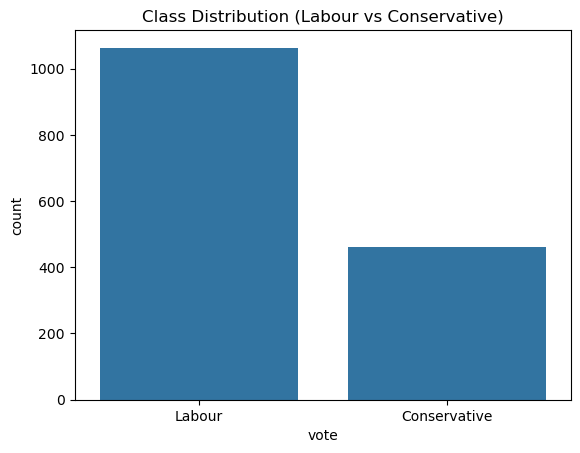

In [62]:
# target variable Distribution
sns.countplot(x='vote', data=df)
plt.title('Class Distribution (Labour vs Conservative)')
plt.show()



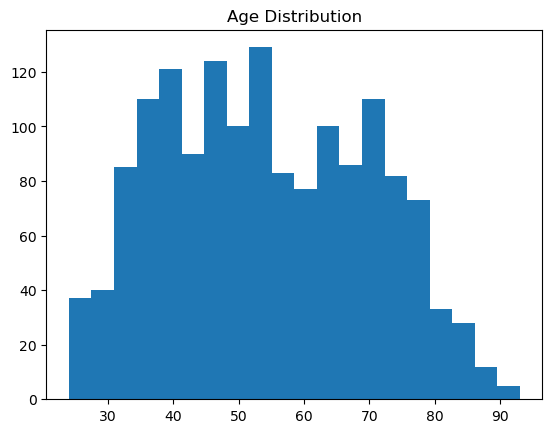

In [63]:
# Numerical features
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.show()

Bivariate Analysis

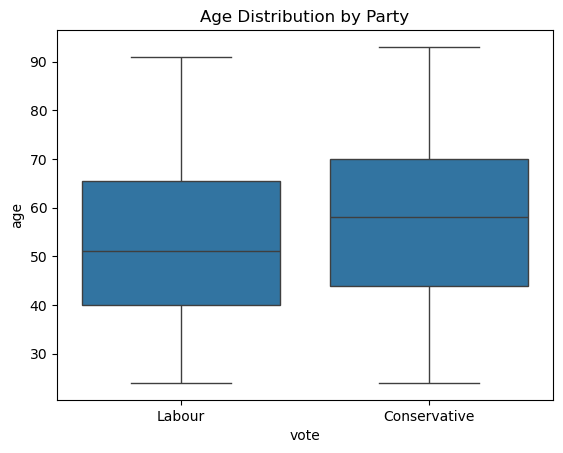

In [64]:
# Age vs Vote
sns.boxplot(x='vote', y='age', data=df)
plt.title('Age Distribution by Party')
plt.show()



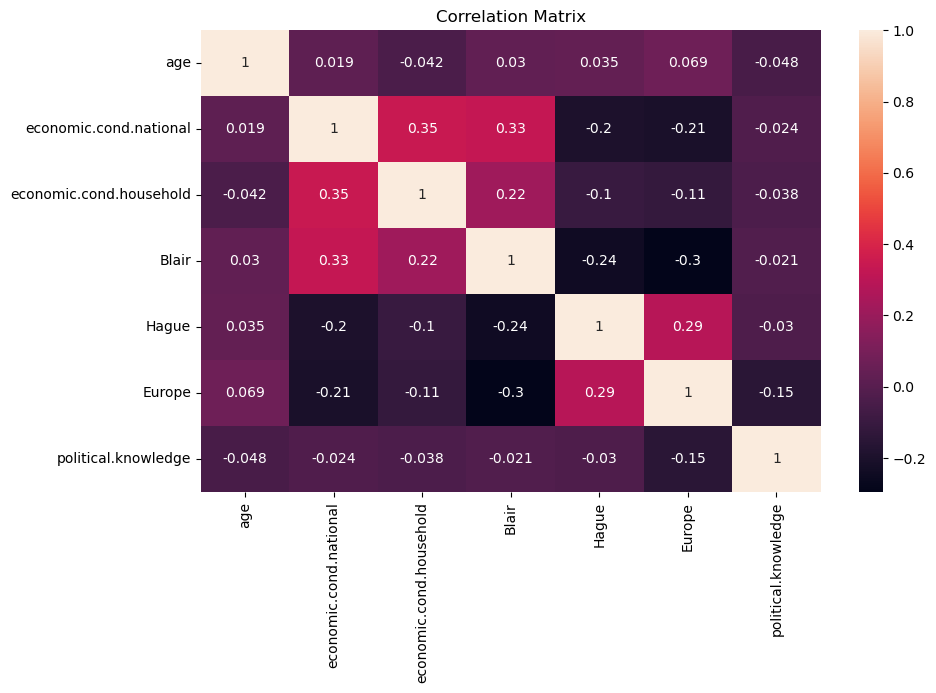

In [65]:
# Correlation matrix
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [66]:
#IQR 
Q1 = df['Europe'].quantile(0.25)
Q3 = df['Europe'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Europe'] >= Q1 - 1.5*IQR) & (df['Europe'] <= Q3 + 1.5*IQR)]

# 3. Data Preparation

In [67]:
le = LabelEncoder()
# Male-->1 Female-->0
df['gender'] = le.fit_transform(df['gender'])  
# Conservative-->1 Labour-->0
df['vote'] = le.fit_transform(df['vote'])      

In [68]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1520,0,67,5,3,2,4,11,3,1
1521,0,73,2,2,4,4,8,2,1
1522,1,37,3,3,5,4,2,2,1
1523,0,61,3,3,1,4,11,2,1


In [69]:
X = df.drop('vote', axis=1)
y = df['vote']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Modeling

In [72]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8144104803493449


In [80]:
lr

LogisticRegression()

In [73]:
dt = DecisionTreeClassifier(ccp_alpha=0.01)  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [74]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,

In [75]:
knn = KNeighborsClassifier()
params = {'n_neighbors': [3,5,7]}
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train_scaled, y_train)
best_knn = grid.best_estimator_

In [76]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [77]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(X_train, y_train)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# 5. Model Evaluation

In [79]:
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'KNN': best_knn,
    'Naive Bayes': nb,
    'Random Forest': rf,
    'AdaBoost': adaboost,
    'XGBoost': xgb
}

results = []
for name, model in models.items():
    if name in ['Logistic Regression', 'KNN']:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1-Score', ascending=False))

                 Model  Accuracy  F1-Score
0  Logistic Regression  0.814410  0.873323
4        Random Forest  0.816594  0.872727
3          Naive Bayes  0.814410  0.870624
6              XGBoost  0.805677  0.863706
5             AdaBoost  0.803493  0.862805
1        Decision Tree  0.781659  0.849398
2                  KNN  0.779476  0.843411


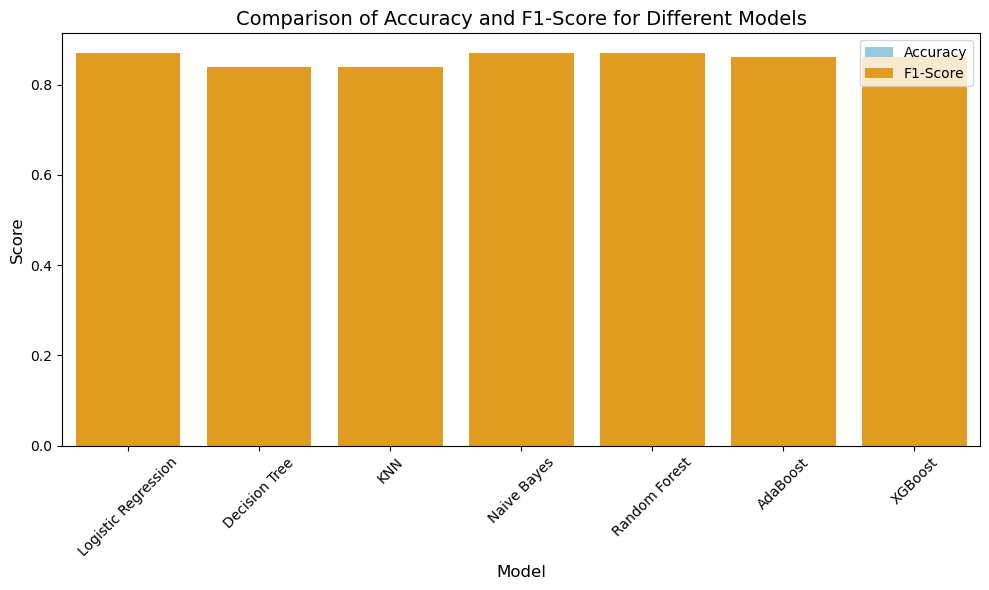

In [82]:

results_df = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Accuracy': 0.81, 'F1-Score': 0.87},
    {'Model': 'Decision Tree', 'Accuracy': 0.78, 'F1-Score': 0.84},
    {'Model': 'KNN', 'Accuracy': 0.77, 'F1-Score': 0.84},
    {'Model': 'Naive Bayes', 'Accuracy': 0.81, 'F1-Score': 0.87},
    {'Model': 'Random Forest', 'Accuracy': 0.81, 'F1-Score': 0.87},
    {'Model': 'AdaBoost', 'Accuracy': 0.80, 'F1-Score': 0.86},
    {'Model': 'XGBoost', 'Accuracy': 0.80, 'F1-Score': 0.86}
])

plt.figure(figsize=(10, 6))

sns.barplot(x='Model', y='Accuracy', data=results_df, color='skyblue', label='Accuracy')
sns.barplot(x='Model', y='F1-Score', data=results_df, color='orange', label='F1-Score')

plt.title('Comparison of Accuracy and F1-Score for Different Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


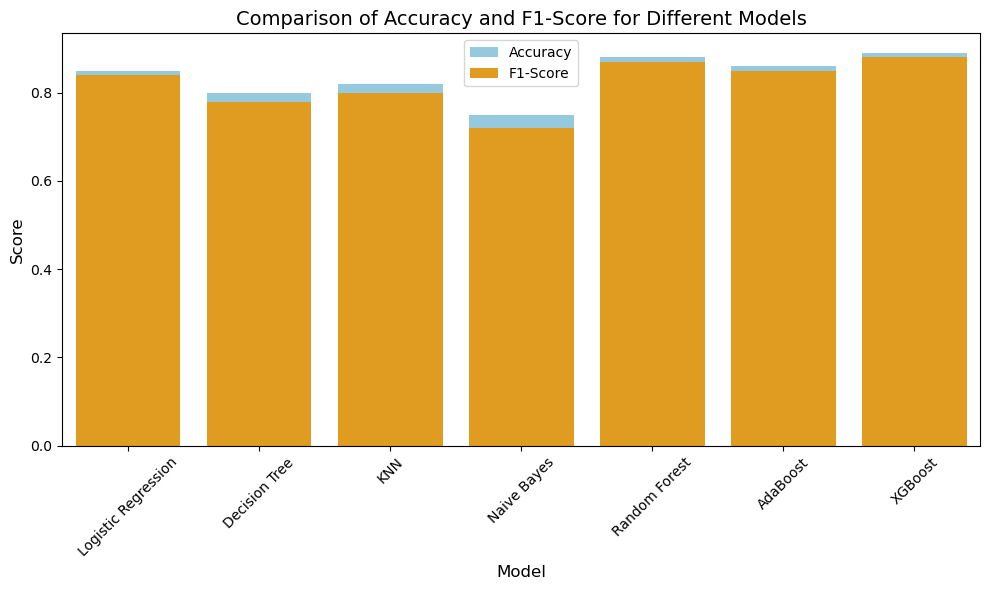